In [1]:
import requests
import os
from spotify_utils import load_credentials

api_key, api_secret = load_credentials()

In [2]:
from spotify_connection import SpotifyConn
conn = SpotifyConn()
conn.authorize(api_key, api_secret)
token = conn.get_access_token()

In [3]:
from spotify_api import SpotifyApi
api = SpotifyApi(token)

In [4]:
p = api.GetPlaylistInfo("387OhCc6mEbm96wzfFfhpp")

In [5]:
p.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [6]:
p["tracks"]["total"]

84

In [7]:
for t in p["tracks"]["items"]:
    print(t["track"]["id"])

38T0tPVZHcPZyhtOcCP7pF
0RM8O4t1Bhm5kqp0v6bdlp
5scYmJwXDkJKwZxCyZ2eJi
6jrhM7a1WutMCrxstNERAS
7bKTYD3I09ooHVVIPT8TVs
6XJJZX0iAIRjvJV3Cp37Ld
3vI81Vdm9QTMTHJ4jLKT0I
3w9BvZtn4KYDLbv9uHYMyR
2LMXAlcaN53mR1eHiwnJbb
2oKlfdH7fCAe8z747g4nB1
5wY7ZogIkopqocAjGeyzPO
77CdmLyI4X3aMaIM8tDfAh
3loPEnpB2etfSF6yj55No7
3VjEZW12YW8yIxjKIzUZfi
5se16gmowjt08lPNzhM9zB
2HoUttBjnYCtEoXsNbOXam
4Mtx9n9E7YPHOlZ2JP9ahR
2X3JGSEfV6nFpGA7vE2J6j
0jxRiAmMulCY61Tbt8AUrB
1Rn0B4zeGbcttEct0N1XpP
7KP37Bb5QbhCPj8dYOO5Fz
2oKlfdH7fCAe8z747g4nB1
6y20BV5L33R8YXM0YuI38N
1RwDsaft1szD0FO3DVEtaT
5fb0p81SAZBkZEvmLAfGKz
0MHHAIjPAd3OSfBS3H0fPg
3XaQQKhU2pumYcya8Xypro
52LL3IFB8N3PaJmoZ8Xii1
06hBdrgjUendZyH9U1WV22
5xoNx4guLOeGsuFxuqTord
4zx4H3Q0ASymmPgbfUmeRo
6GyDY0yE47rfk8pcuKhioh
1D3YGmST01Ba0WRiT7THPG
1rzYrkxgRuLLJDqWdB32pK
0wzRcekWyVCSyPtlPOeJau
37gG4GPeTRPKKdXYx3zTRC
7f9I5WdyXm5q1XqnSYgQZb
0NdTUS4UiNYCNn5FgVqKQY
3czdA0j4iaLDJJCoT5D8iP
6wVWJl64yoTzU27EI8ep20
5kxVyCgEUND7E2QKG7JmoF
5eyTC5GZzpzlN7YRO9AoPf
5bsnLiT00hG37qd8p2jdVl
086myS9r57Y

In [8]:
p["tracks"]["items"][0]

{'added_at': '2023-07-18T16:59:41Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/kosa99pl'},
  'href': 'https://api.spotify.com/v1/users/kosa99pl',
  'id': 'kosa99pl',
  'type': 'user',
  'uri': 'spotify:user:kosa99pl'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7jVv8c5Fj3E9VhNjxT4snq'},
     'href': 'https://api.spotify.com/v1/artists/7jVv8c5Fj3E9VhNjxT4snq',
     'id': '7jVv8c5Fj3E9VhNjxT4snq',
     'name': 'Lil Nas X',
     'type': 'artist',
     'uri': 'spotify:artist:7jVv8c5Fj3E9VhNjxT4snq'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',


In [9]:
track_id_1 = "5scYmJwXDkJKwZxCyZ2eJi"
track_id_2 = "6XJJZX0iAIRjvJV3Cp37Ld"

headers = {'Authorization': f'Bearer {token}'}
r = requests.get(f"https://api.spotify.com/v1/audio-features/{track_id_1},{track_id_2}", headers=headers)

In [10]:
r

<Response [400]>

https://developer.spotify.com/documentation/web-api/reference/get-audio-features


In [13]:
ids = ""
for t in p["tracks"]["items"]:
    id = t["track"]["id"]
    ids += id + ","
r = requests.get(f"https://api.spotify.com/v1/audio-features?ids={ids[:-2]}", headers=headers)

In [14]:
len(r.json()["audio_features"])

84

In [15]:
r.json()['audio_features'][-1]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.DataFrame(r.json()['audio_features'][:-1])


In [18]:
import numpy as np

<Axes: ylabel='Frequency'>

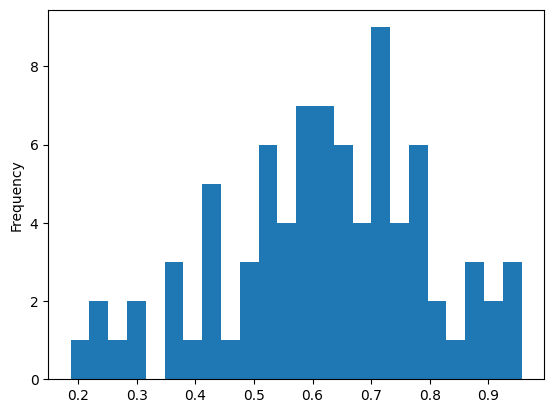

In [19]:
df["danceability"].plot.hist(bins=24)

<Axes: ylabel='Density'>

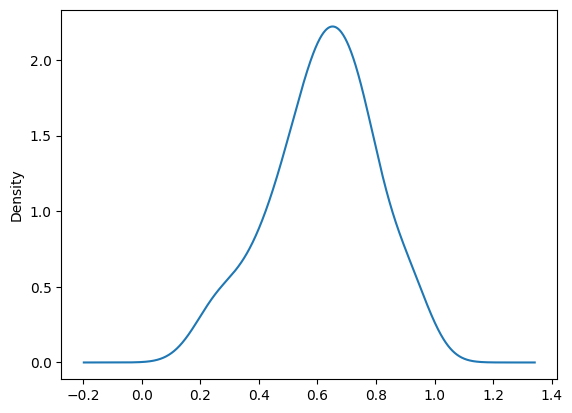

In [20]:
df["danceability"].plot.kde()

In [21]:
df[df["danceability"] == df["danceability"].max()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
77,0.957,0.7,1,-6.192,1,0.17,0.189,0.102,0.053,0.845,130.106,audio_features,2Y6sYRN1zHuC4RE7ftNWYt,spotify:track:2Y6sYRN1zHuC4RE7ftNWYt,https://api.spotify.com/v1/tracks/2Y6sYRN1zHuC...,https://api.spotify.com/v1/audio-analysis/2Y6s...,197342,4


In [22]:
df.sort_values(by="danceability", ascending=False).head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
77,0.957,0.700,1,-6.192,1,0.170,0.189,0.102,0.053,0.845,130.106,audio_features,2Y6sYRN1zHuC4RE7ftNWYt,spotify:track:2Y6sYRN1zHuC4RE7ftNWYt,https://api.spotify.com/v1/tracks/2Y6sYRN1zHuC...,https://api.spotify.com/v1/audio-analysis/2Y6s...,197342,4
70,0.940,0.482,1,-7.454,1,0.184,0.118,0.000,0.089,0.317,107.992,audio_features,3iIu8fcVztSKU1uiz5xfuc,spotify:track:3iIu8fcVztSKU1uiz5xfuc,https://api.spotify.com/v1/tracks/3iIu8fcVztSK...,https://api.spotify.com/v1/audio-analysis/3iIu...,191111,4
76,0.927,0.611,1,-4.672,1,0.128,0.133,0.000,0.129,0.236,129.054,audio_features,6ClWZ12bBTGXAUjSkvGZdj,spotify:track:6ClWZ12bBTGXAUjSkvGZdj,https://api.spotify.com/v1/tracks/6ClWZ12bBTGX...,https://api.spotify.com/v1/audio-analysis/6ClW...,122791,4
74,0.922,0.747,1,-6.695,1,0.145,0.223,0.000,0.252,0.315,110.029,audio_features,4yHfTcEnBFtnHYAjp5ECIR,spotify:track:4yHfTcEnBFtnHYAjp5ECIR,https://api.spotify.com/v1/tracks/4yHfTcEnBFtn...,https://api.spotify.com/v1/audio-analysis/4yHf...,133091,4
59,0.898,0.694,2,-9.171,1,0.304,0.297,0.000,0.255,0.895,96.976,audio_features,1665EkzeTTVQPc54hX6TJ2,spotify:track:1665EkzeTTVQPc54hX6TJ2,https://api.spotify.com/v1/tracks/1665EkzeTTVQ...,https://api.spotify.com/v1/audio-analysis/1665...,178763,4


In [23]:
df.sort_values(by="danceability", ascending=True).head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
25,0.187,0.855,11,-4.316,0,0.0624,0.000531,0.020400,0.361,0.257,160.892,audio_features,0MHHAIjPAd3OSfBS3H0fPg,spotify:track:0MHHAIjPAd3OSfBS3H0fPg,https://api.spotify.com/v1/tracks/0MHHAIjPAd3O...,https://api.spotify.com/v1/audio-analysis/0MHH...,235400,3
46,0.244,0.896,6,-5.576,0,0.4640,0.061400,0.000028,0.127,0.142,83.354,audio_features,45n7uujqwmMyBMjBu9SwRu,spotify:track:45n7uujqwmMyBMjBu9SwRu,https://api.spotify.com/v1/tracks/45n7uujqwmMy...,https://api.spotify.com/v1/audio-analysis/45n7...,220507,4
34,0.246,0.991,9,-3.903,1,0.0870,0.009440,0.075300,0.867,0.415,159.390,audio_features,0wzRcekWyVCSyPtlPOeJau,spotify:track:0wzRcekWyVCSyPtlPOeJau,https://api.spotify.com/v1/tracks/0wzRcekWyVCS...,https://api.spotify.com/v1/audio-analysis/0wzR...,187147,4
29,0.264,0.882,7,-4.362,1,0.0791,0.000570,0.112000,0.283,0.766,85.537,audio_features,5xoNx4guLOeGsuFxuqTord,spotify:track:5xoNx4guLOeGsuFxuqTord,https://api.spotify.com/v1/tracks/5xoNx4guLOeG...,https://api.spotify.com/v1/audio-analysis/5xoN...,390579,4
42,0.287,0.721,9,-5.810,1,0.0387,0.007640,0.000000,0.328,0.763,169.252,audio_features,5bsnLiT00hG37qd8p2jdVl,spotify:track:5bsnLiT00hG37qd8p2jdVl,https://api.spotify.com/v1/tracks/5bsnLiT00hG3...,https://api.spotify.com/v1/audio-analysis/5bsn...,197973,4


<Axes: xlabel='danceability', ylabel='energy'>

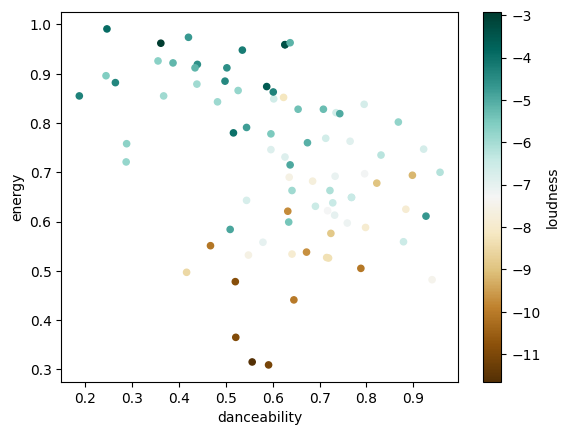

In [24]:
df.plot(kind="scatter", x="danceability", y="energy", c="loudness", colormap="BrBG")

In [25]:
songs_ids = df.sort_values(by="danceability", ascending=True).head(5)["id"].values
ids = ','.join(songs_ids)

In [27]:
songs_ids

array(['0MHHAIjPAd3OSfBS3H0fPg', '45n7uujqwmMyBMjBu9SwRu',
       '0wzRcekWyVCSyPtlPOeJau', '5xoNx4guLOeGsuFxuqTord',
       '5bsnLiT00hG37qd8p2jdVl'], dtype=object)

In [32]:
l = api.GetTracksMetadata(songs_ids)

In [33]:
l

[{'title': 'My God Is the Sun',
  'artist': 'Queens of the Stone Age',
  'album': '...Like Clockwork',
  'img': 'https://i.scdn.co/image/ab67616d0000b273eee7c041844e45dd76469fa0'},
 {'title': 'Pretty Visitors',
  'artist': 'Arctic Monkeys',
  'album': 'Humbug',
  'img': 'https://i.scdn.co/image/ab67616d0000b273f65d720a5d70dbb93e96d528'},
 {'title': 'Go With The Flow',
  'artist': 'Queens of the Stone Age',
  'album': 'Songs For The Deaf',
  'img': 'https://i.scdn.co/image/ab67616d0000b2739eec33b045d88f87b9b06e67'},
 {'title': 'The Evil Has Landed',
  'artist': 'Queens of the Stone Age',
  'album': 'Villains',
  'img': 'https://i.scdn.co/image/ab67616d0000b27389401ba9a9c231e2add35ae8'},
 {'title': 'Cornerstone',
  'artist': 'Arctic Monkeys',
  'album': 'Humbug',
  'img': 'https://i.scdn.co/image/ab67616d0000b273f65d720a5d70dbb93e96d528'}]

In [ ]:
ids

'0MHHAIjPAd3OSfBS3H0fPg?45n7uujqwmMyBMjBu9SwRu?0wzRcekWyVCSyPtlPOeJau?5xoNx4guLOeGsuFxuqTord?5bsnLiT00hG37qd8p2jdVl'

In [ ]:
r = requests.get(f"https://api.spotify.com/v1/tracks?ids={ids}", headers=headers)

In [ ]:
r

<Response [200]>

In [ ]:
type(r)

requests.models.Response

In [ ]:
tracks = r.json()['tracks']

In [ ]:
df2 = pd.DataFrame(tracks)

In [ ]:
tracks['tracks'][0]['name']

'My God Is the Sun'

In [ ]:
tracks['tracks'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [ ]:
tracks['tracks'][0]['artists'][0]['name']

'Queens of the Stone Age'

In [ ]:
tracks['tracks'][0]['album']['name']

'...Like Clockwork'

In [ ]:
tracks['tracks'][0]['album']['images'][0]["url"]

'https://i.scdn.co/image/ab67616d0000b273eee7c041844e45dd76469fa0'